In [1]:
%matplotlib inline

In [2]:
#Set model to freely swim
use_free_move = False

In [3]:
import pynamics
from pynamics.frame import Frame
from pynamics.variable_types import Differentiable,Constant
from pynamics.system import System
from pynamics.body import Body
from pynamics.dyadic import Dyadic
from pynamics.output import Output,PointsOutput
from pynamics.output_points_3d import PointsOutput3D
from pynamics.constraint import AccelerationConstraint,KinematicConstraint
from pynamics.particle import Particle
import pynamics.integration
import numpy
import matplotlib.pyplot as plt
plt.ion()
from math import pi,sin
import sympy
from sympy import sqrt
import math
import scipy.optimize
from matplotlib import animation, rc
from IPython.display import HTML


system = System()
pynamics.set_system(__name__,system)

In [4]:
#Defining Constants of System
seg_len = .005
seg_mass = 1
seg_h = 1
seg_th = 1

lA = Constant(seg_len,'lA',system)
lB = Constant(seg_len,'lB',system)
lC = Constant(seg_len,'lC',system)
lD = Constant(seg_len,'lD',system)
lE = Constant(seg_len,'lE',system)
lF = Constant(seg_len,'lF',system)
lG = Constant(seg_len,'lG',system) #Tail segment
lP = Constant(seg_len*5,'lP',system) #Constrained length

mA = Constant(seg_mass,'mA',system)
mB = Constant(seg_mass,'mB',system)
mC = Constant(seg_mass,'mC',system)
mD = Constant(seg_mass,'mD',system)
mE = Constant(seg_mass,'mE',system)
mF = Constant(seg_mass,'mF',system)
mG = Constant(seg_mass,'mG',system)

g = Constant(9.81,'g',system)
b = Constant(1e-1,'b',system)
k = Constant(1e0,'k',system)

freq = Constant(.1,'freq',system)
amp = Constant(55*pi/180,'torque',system)
torque = Constant(1e0,'torque',system)

Ixx_A = Constant(1/12*seg_mass*(seg_h*2 + seg_th**2),'Ixx_A',system)
Iyy_A = Constant(1/12*seg_mass*(seg_h**2 + seg_len**2),'Iyy_A',system)
Izz_A = Constant(1/12*seg_mass*(seg_len**2 + seg_th**2),'Izz_A',system)
Ixx_B = Constant(1/12*seg_mass*(seg_h*2 + seg_th**2),'Ixx_B',system)
Iyy_B = Constant(1/12*seg_mass*(seg_h**2 + seg_len**2),'Iyy_B',system)
Izz_B = Constant(1/12*seg_mass*(seg_len**2 + seg_th**2),'Izz_B',system)
Ixx_C = Constant(1/12*seg_mass*(seg_h*2 + seg_th**2),'Ixx_C',system)
Iyy_C = Constant(1/12*seg_mass*(seg_h**2 + seg_len**2),'Iyy_C',system)
Izz_C = Constant(1/12*seg_mass*(seg_len**2 + seg_th**2),'Izz_C',system)
Ixx_D = Constant(1/12*seg_mass*(seg_h*2 + seg_th**2),'Ixx_D',system)
Iyy_D = Constant(1/12*seg_mass*(seg_h**2 + seg_len**2),'Iyy_D',system)
Izz_D = Constant(1/12*seg_mass*(seg_len**2 + seg_th**2),'Izz_D',system)
Ixx_E = Constant(1/12*seg_mass*(seg_h*2 + seg_th**2),'Ixx_E',system)
Iyy_E = Constant(1/12*seg_mass*(seg_h**2 + seg_len**2),'Iyy_E',system)
Izz_E = Constant(1/12*seg_mass*(seg_len**2 + seg_th**2),'Izz_E',system)
Ixx_F = Constant(1/12*seg_mass*(seg_h*2 + seg_th**2),'Ixx_F',system)
Iyy_F = Constant(1/12*seg_mass*(seg_h**2 + seg_len**2),'Iyy_F',system)
Izz_F = Constant(1/12*seg_mass*(seg_len**2 + seg_th**2),'Izz_F',system)
Ixx_G = Constant(1/12*seg_mass*(seg_h*2 + seg_th**2),'Ixx_G',system)
Iyy_G = Constant(1/12*seg_mass*(seg_h**2 + seg_len**2),'Iyy_G',system)
Izz_G = Constant(1/12*seg_mass*(seg_len**2 + seg_th**2),'Izz_G',system)

In [5]:
#Set integration tolerance
tol = 1e-3

In [6]:
#Set simulation run time
tinitial = 0
tfinal = 10
fps = 30
tstep = 1/fps
t = numpy.r_[tinitial:tfinal:tstep]

In [7]:
#Define derivatives of frames
qA,qA_d,qA_dd = Differentiable('qA',system)
qB,qB_d,qB_dd = Differentiable('qB',system)
qC,qC_d,qC_dd = Differentiable('qC',system)
qD,qD_d,qD_dd = Differentiable('qD',system)
qE,qE_d,qE_dd = Differentiable('qE',system)
qF,qF_d,qF_dd = Differentiable('qF',system)
qG,qG_d,qG_dd = Differentiable('qG',system)

if use_free_move:
    x,x_d,x_dd = Differentiable('x',system)
    #y,y_d,y_dd = Differentiable('y',system)

In [8]:
#set initial conditions
initialvalues = {}
initialvalues[qA]=70*pi/180
initialvalues[qA_d]=0*pi/180
initialvalues[qB]=30*pi/180
initialvalues[qB_d]=0*pi/180
initialvalues[qC]=0*pi/180
initialvalues[qC_d]=0*pi/180
initialvalues[qD]=0*pi/180
initialvalues[qD_d]=0*pi/180
initialvalues[qE]=-10*pi/180
initialvalues[qE_d]=0*pi/180
initialvalues[qF]=-40*pi/180
initialvalues[qF_d]=0*pi/180
initialvalues[qG]=0*pi/180
initialvalues[qG_d]=0*pi/180

if use_free_move:
    initialvalues[x]=0*pi/180
    initialvalues[x_d]=0*pi/180
    #initialvalues[y]=0*pi/180
    #initialvalues[y_d]=0*pi/180

statevariables = system.get_state_variables()
ini0 = [initialvalues[item] for item in statevariables]

In [9]:
#Frames
N = Frame('N',system)
A = Frame('A',system)
B = Frame('B',system)
C = Frame('C',system)
D = Frame('D',system)
E = Frame('E',system)
F = Frame('F',system)
G = Frame('G',system)

system.set_newtonian(N)

A.rotate_fixed_axis(N,[0,0,1],qA,system)
B.rotate_fixed_axis(N,[0,0,1],qB,system)
C.rotate_fixed_axis(N,[0,0,1],qC,system)
D.rotate_fixed_axis(N,[0,0,1],qD,system)
E.rotate_fixed_axis(N,[0,0,1],qE,system)
F.rotate_fixed_axis(N,[0,0,1],qF,system)
G.rotate_fixed_axis(N,[0,0,1],qG,system)

In [10]:
#Vectors

if use_free_move:
    pNA=x*N.x + 0*N.y + 0*N.z
    pP = lP*N.x + x*N.x
else:
    pNA=0*N.x + 0*N.y + 0*N.z
    pP = lP*N.x
    
pAB= pNA + lA*A.x
pBC = pAB + lB*B.x
pCD = pBC + lC*C.x
pDE = pCD + lD*D.x
pEF = pDE + lE*E.x
pFG = pEF + lF*F.x
pGtip = pFG + lG*G.x

#Center of Mass
pAcm=pNA+lA/2*A.x
pBcm=pAB+lB/2*B.x
pCcm=pBC+lC/2*C.x
pDcm=pCD+lD/2*D.x
pEcm=pDE+lE/2*E.x
pFcm=pEF+lF/2*F.x
pGcm=pFG+lG/2*G.x

#Angular Velocity
wNA = N.get_w_to(A)
wAB = A.get_w_to(B) 
wBC = B.get_w_to(C)
wCD = C.get_w_to(D) 
wDE = D.get_w_to(E)
wEF = E.get_w_to(F)
wFG = F.get_w_to(G)

#Velocities 
vGtip=pGtip.time_derivative()

#Interia and Bodys
IA = Dyadic.build(A,Ixx_A,Iyy_A,Izz_A)
IB = Dyadic.build(B,Ixx_B,Iyy_B,Izz_B)
IC = Dyadic.build(C,Ixx_C,Iyy_C,Izz_C)
ID = Dyadic.build(D,Ixx_D,Iyy_D,Izz_D)
IE = Dyadic.build(E,Ixx_E,Iyy_E,Izz_E)
IF = Dyadic.build(F,Ixx_F,Iyy_F,Izz_F)
IG = Dyadic.build(G,Ixx_G,Iyy_G,Izz_G)

BodyA = Body('BodyA',A,pAcm,mA,IA,system)
BodyB = Body('BodyB',B,pBcm,mB,IB,system)
BodyC = Body('BodyC',C,pCcm,mC,IC,system)
BodyD = Body('BodyD',D,pDcm,mD,ID,system)
BodyE = Body('BodyE',E,pEcm,mE,IE,system)
BodyF = Body('BodyF',F,pFcm,mF,IF,system)
BodyG = Body('BodyG',G,pGcm,mG,IG,system)

In [11]:
#Forces
#system.addforce(torque*sympy.cos(freq*2*pi*system.t)*A.z,wNA)

#Damping Forces
system.addforce(-b*wNA,wNA)
system.addforce(-b*wAB,wAB)
system.addforce(-b*wBC,wBC)
system.addforce(-b*wCD,wCD)
system.addforce(-b*wDE,wDE)
system.addforce(-b*wEF,wEF)
system.addforce(-b*wFG,wFG)

#Spring Force (Torsion)
system.add_spring_force1(k,(qA)*N.z,wNA) 
system.add_spring_force1(k,(qB-qA)*N.z,wAB)
system.add_spring_force1(k,(qC-qB)*N.z,wBC)
system.add_spring_force1(k,(qD-qC)*N.z,wCD) 
system.add_spring_force1(k,(qE-qD)*N.z,wDE)
system.add_spring_force1(k,(qF-qE)*N.z,wEF)
system.add_spring_force1(k,(qG-qF)*N.z,wFG)

(<pynamics.force.Force at 0x1e3874a5760>,
 <pynamics.spring.Spring at 0x1e3875af7c0>)

In [12]:
#Constraints for initial condition

eq = []

eq.append(pFG-pP)
    
eq_scalar = []
eq_scalar.append(eq[0].dot(N.x))
eq_scalar.append(eq[0].dot(N.y))
eq_scalar

[lA*cos(qA) + lB*cos(qB) + lC*cos(qC) + lD*cos(qD) + lE*cos(qE) + lF*cos(qF) - lP, lA*sin(qA) + lB*sin(qB) + lC*sin(qC) + lD*sin(qD) + lE*sin(qE) + lF*sin(qF)]

In [13]:
#Solve for Intial Conditions
if use_free_move:
    qi = [qA,x]
else:  
    qi = [qA]
    
qd = [qB,qC,qD,qE,qF,qG]

eq_scalar_c = [item.subs(system.constant_values) for item in eq_scalar]
defined = dict([(item,initialvalues[item]) for item in qi])
eq_scalar_c = [item.subs(defined) for item in eq_scalar_c]

error = (numpy.array(eq_scalar_c)**2).sum()

f = sympy.lambdify(qd,error)

def function(args):
    return f(*args)

guess = [initialvalues[item] for item in qd]

result = scipy.optimize.minimize(function,guess)
if result.fun>1e-6:
    raise(Exception("out of tolerance"))
    
ini = []
for item in system.get_state_variables():
    if item in qd:
        ini.append(result.x[qd.index(item)])
    else:
        ini.append(initialvalues[item])

2022-04-08 17:12:12,727 - pynamics.output - INFO - calculating outputs
2022-04-08 17:12:13,015 - pynamics.output - INFO - done calculating outputs


<AxesSubplot:>

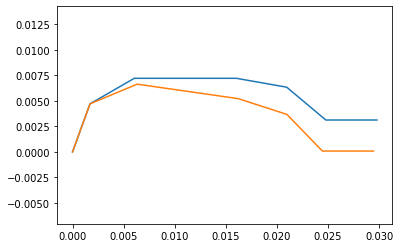

In [14]:
#Plot Initial State
points = [pNA,pAB,pBC,pCD,pDE,pEF,pFG,pGtip]
points_output = PointsOutput(points, constant_values=system.constant_values)
points_output.calc(numpy.array([ini0,ini]),numpy.array([0,1]))
points_output.plot_time()

Plot of Device: Points are as follow from left to right. (pNA,pAB,pBC,pCD,pDE,pEF,pFG,pGtip). All the frames are relative to the newtonian frame. See last page of document to see diagram of device.

In [15]:
#Solve for Torque at end effector (qG_tip)

#Derivative of constraints
eq_d = [(system.derivative(item)) for item in eq_scalar]
eq_d = sympy.Matrix(eq_d)
eq_d = eq_d.subs(system.constant_values)

qi = sympy.Matrix([qA_d])
qd = sympy.Matrix([qB_d,qC_d,qD_d,qE_d,qF_d,qG_d])

AA = eq_d.jacobian(qi)

BB = eq_d.jacobian(qd)

J_int = -BB.transpose()*AA
J_int

vout = pGtip.time_derivative()
vout = sympy.Matrix([vout.dot(N.x), vout.dot(N.y)])

Ji = vout.jacobian(qi)
Jd = vout.jacobian(qd)

J = Ji + Jd*J_int

J = [item.subs(system.constant_values).subs({qA:ini[0], qB:ini[1], qC:ini[2], qD:ini[3], qE:ini[4], qF:ini[5], qG:ini[6]}) for item in J]

print('Velocity at pGtip')
J

Velocity at pGtip


[-0.00469839990567111, 0.00171000544586941]

In [16]:
#Adding Dynamic Constraints

#Position of motor limits
pos = amp*sympy.cos(freq*2*pi*system.t)

eq = []

eq.append(pFG-pP)
#eq.append(pos*N.z-qA*N.z)

eq_scalar = []
eq_scalar.append(eq[0].dot(N.x))
eq_scalar.append(eq[0].dot(N.y))
#eq_scalar.append(eq[1].dot(N.z))
eq_scalar_d = [system.derivative(item) for item in eq_scalar]
eq_scalar_dd = [system.derivative(item) for item in eq_scalar_d]

system.add_constraint(AccelerationConstraint(eq_scalar_dd))

2022-04-08 17:12:14,427 - pynamics.system - INFO - getting dynamic equations
2022-04-08 17:12:18,296 - pynamics.system - INFO - solving a = f/m and creating function
2022-04-08 17:12:21,534 - pynamics.system - INFO - substituting constrained in Ma-f.
2022-04-08 17:12:22,178 - pynamics.system - INFO - done solving a = f/m and creating function
2022-04-08 17:12:22,178 - pynamics.system - INFO - calculating function for lambdas
2022-04-08 17:12:22,380 - pynamics.integration - INFO - beginning integration
2022-04-08 17:12:22,380 - pynamics.system - INFO - integration at time 0000.00
2022-04-08 17:12:23,125 - pynamics.integration - INFO - finished integration


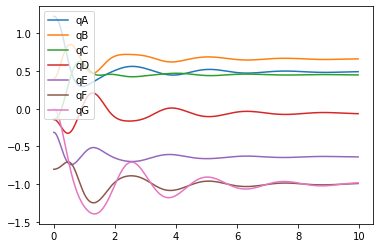

In [17]:
#Solve model and plot angles

f,ma = system.getdynamics()

func1,lambda1 = system.state_space_post_invert(f,ma,return_lambda = True)

states=pynamics.integration.integrate(func1,ini,t,rtol=tol,atol=tol,hmin=tol, args=({'constants':system.constant_values},))


plt.figure()
artists = plt.plot(t,states[:,:7])
plt.legend(artists,['qA','qB','qC','qD','qE','qF','qG'])

2022-04-08 17:12:23,720 - pynamics.output - INFO - calculating outputs
2022-04-08 17:12:23,769 - pynamics.output - INFO - done calculating outputs


<AxesSubplot:>

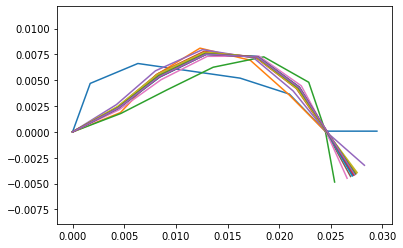

In [18]:
points_output = PointsOutput(points,system)
y = points_output.calc(states,t)
points_output.plot_time(20)

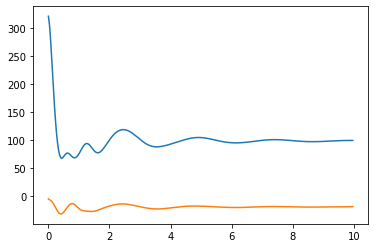

In [19]:
#Constraint Forces

lambda2 = numpy.array([lambda1(item1,item2,system.constant_values) for item1,item2 in zip(t,states)])
plt.figure()
plt.plot(t, lambda2)

2022-04-08 17:12:25,509 - pynamics.output - INFO - calculating outputs
2022-04-08 17:12:25,662 - pynamics.output - INFO - done calculating outputs


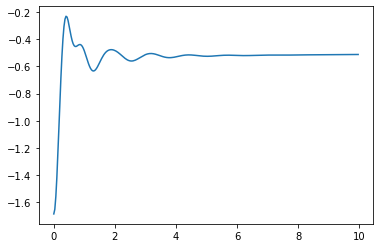

In [20]:
#Energy Plot

KE = system.get_KE()
PE = system.getPESprings()
energy_output = Output([KE-PE],system)
energy_output.calc(states,t)
energy_output.plot_time(t)

Text(0, 0.5, 'Position Y (m)')

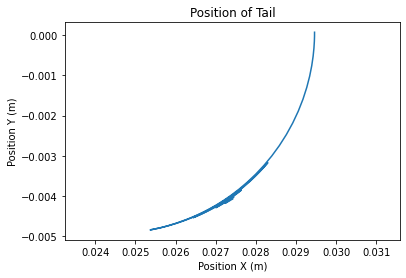

In [21]:
#Plotting Motion of Tail

plt.plot(y[:,7,0],y[:,7,1])
plt.axis('equal')
plt.title('Position of Tail')
plt.xlabel('Position X (m)')
plt.ylabel('Position Y (m)')

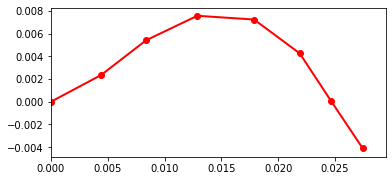

In [22]:
points_output.animate(fps = fps,movie_name = 'render.mp4',lw=2,marker='o',color=(1,0,0,1),linestyle='-')
HTML(points_output.anim.to_html5_video())

# Discussion

1. How many degrees of freedom does your device have? How many motors? If the answer is not the same, what determines the state of the remaining degrees of freedom? How did you arrive at that number?
 
Our device has five degrees of freedom, and the team plans to actuate it using a single servo motor. The rest of the segments will be constrained except for an unconstrained tail. We arrived at this conclusion by constraining multiple joints to see at what point we lose all foldable motion.
 
2. If your mechanism has more than one degree of freedom, please describe how those multiple degrees of freedom will work together to create a locomotory gait or useful motion. What is your plan for synchronizing, especially if passive energy storage?
 
In order to achieve the desired undulatory motion, the plan is to tune the stiffness of each joint. Through simulation, the team will determine the necessary stiffness of the joints in order to achieve the sinusoidal movement.
 
3. How did you estimate your expected end-effector forces
 
The forces that would act upon were calculated using the pynamics package in Python while running the simulation of a given force. It is almost impossible determine the expected forces at the tail of eels because they are unstable systems when held stationary. Additionally for this device, the force of the output is not critical and it is more crucial to tune the spine to imitate the motion of eels.
 
4. How did you estimate your expected end-effector speeds
 
Similarly to force estimations, the speeds were also estimated using pynamics. These estimations allowed the team to estimate the torque of the end efector to be [0.003, -0.003]. These values have been validated through the Biomechanics Background assignment. 
